In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle as pkl
from scipy import stats

import csv
import sys
import pandas as pd
import os

from SelectionHelper import MakeAvgBDTcut

Welcome to JupyROOT 6.16/00


In [3]:
dirtt = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_dirt_fset12_run3.parquet.gzip')

In [17]:
dirtt['weights'] = dirtt['POTweight']**-1 *6.67e20
dirtt.query('Enu_1e1p>200 and Enu_1e1p<1200',inplace=True)
MakeAvgBDTcut(dirtt,0.95,20)

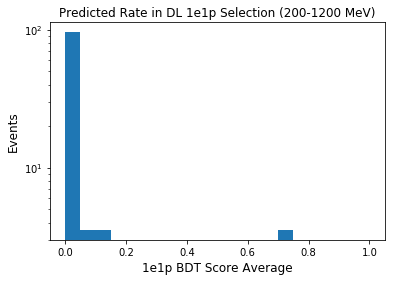

0.221742021277


In [32]:
n,_,_ = plt.hist(dirtt['sigprob'],range=(0,1),bins=20,weights=dirtt['weights'])
plt.semilogy()
plt.xlabel('1e1p BDT Score Average',fontsize=12)
plt.ylabel('Events',fontsize=12)
plt.title('Predicted Rate in DL 1e1p Selection (200-1200 MeV)')
plt.show()
print(0.05/0.8 * 6.67e20 / 1.88e20)

So we have a single event in the range $[0.2, 1,0]$

Let's assume this event is spread out evenly over this region, meaining that we expect

$ \frac{0.05}{0.8} \times 1 =  0.0625 $ events in the signal region

POT-scaled, this corresponds to 

$ 0.0625 \times \frac{6.67 \times 10^{20}}{1.88 \times 10^{20}} = 0.22$ events across our full energy range

As we predict to observe 26.9 events in this energy range, this corresponds to a 0.8% effect

In the pessimistic case, all of these events end up in our signal region. As we predict 7.9 events in the signal region, this would correspond to a 2.8% effect

In [25]:
print(0.2217 / 26.9)
print(0.2217 / 7.9)

0.00824163568773
0.0280632911392
